<a href="https://colab.research.google.com/github/Novice1414/Algorithmic-Toolbox-San-Diego/blob/master/T1T2prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_DataSetmodified.csv',encoding='latin1')
data.head()

,Glucose,Insulin,Diabetes Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1


In [3]:
data = data.rename(columns={'Diabetes Outcome': 'DO'})

In [4]:
#where Output == 2 change to 2 if Insulin < 30 elif change to 3 if insulin > 0
def myfunc(x,y):
    if x <= 30 and y == 2:
        return y
    elif x > 30 and y == 2:
        return y + 1
    else:
        return y

data['DO'] = data.apply(lambda x: myfunc(x.Insulin, x.DO), axis=1)

In [5]:
data.describe()

,Glucose,Insulin,DO
count,768.000000,768.000000,768.000000
mean,120.894531,79.799479,0.348958
std,31.972618,115.244002,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,0.000000,0.000000
50%,117.000000,30.500000,0.000000
75%,140.250000,127.250000,1.000000
max,199.000000,846.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('DO', axis=1)
y = data['DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 2)
(614,)
(154, 2)
(154,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying ANN**

In [9]:
import tensorflow as tf

In [10]:
ann = tf.keras.models.Sequential()

In [11]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))

In [12]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [14]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])


Accuracy: 0.7345277070999146


In [15]:
new_df = pd.DataFrame([[160, 30]])
new_df.columns = ["Glucose", "Insulin"]

**Type 2 prediction**

In [16]:
prediction = ann.predict(new_df)

if prediction == 1:
    print('Type-2')
else:
    print('Type-1')

1/1 [==============================] - 0s 98ms/step
Type-2


**Type 1 prediction**

In [17]:
new_df2 = pd.DataFrame([[10, 30]])
new_df2.columns = ["Glucose", "Insulin"]

In [18]:
prediction2 = ann.predict(new_df2)

1/1 [==============================] - 0s 26ms/step


In [19]:
if prediction2 == 1:
    print('Type-2')
else:
    print('Type-1')

Type-1


<ipython-input-30-ad21bca04bf1>:12: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


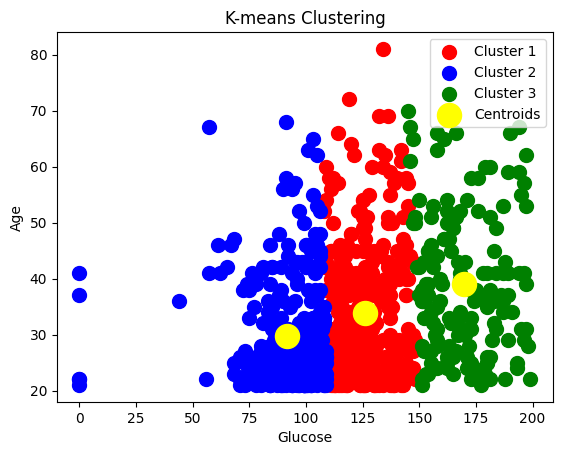

     Glucose  Age  Pregnancies    Diabetes Type
0        148   50            6  Type 2 Diabetes
1         85   31            1  Type 2 Diabetes
2        183   32            8  Type 2 Diabetes
3         89   21            1  Type 2 Diabetes
4        137   33            0  Type 1 Diabetes
..       ...  ...          ...              ...
763      101   63           10  Type 2 Diabetes
764      122   27            2  Type 1 Diabetes
765      121   30            5  Type 1 Diabetes
766      126   47            1  Type 1 Diabetes
767       93   23            1  Type 2 Diabetes

[768 rows x 4 columns]


In [30]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_DataSet.csv')

# Replace missing values with median of each feature
df = df.replace('Unknown', np.nan)
df = df.fillna(df.median())

# Select relevant features
X = df[['Glucose', 'Age', 'Pregnancies']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Define diabetes types based on cluster assignments
diabetes_types = {0: 'Type 1 Diabetes',
                  1: 'Type 2 Diabetes',
                  2: 'Type 2 Diabetes' if np.any(df['Pregnancies'] == 1) else 'Type 3 Diabetes'}

# Predict diabetes type for each data point
y_pred = [diabetes_types[i] for i in y_kmeans]

# Add predicted diabetes type to the dataframe
df['Diabetes Type'] = y_pred

# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()
plt.show()

# Print the predicted diabetes types
print(df[['Glucose', 'Age', 'Pregnancies', 'Diabetes Type']])

In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette = silhouette_score(X, y_kmeans)
print('Silhouette score:', silhouette)

# Calculate the Calinski-Harabasz index
calinski = calinski_harabasz_score(X, y_kmeans)
print('Calinski-Harabasz index:', calinski)

Silhouette score: 0.40393651081011583
Calinski-Harabasz index: 943.941948991854


**Prediction for new datapoints **

In [32]:
# Fit the K-means model to your data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Define diabetes types based on cluster assignments
diabetes_types = {0: 'Type 1 Diabetes',
                  1: 'Type 2 Diabetes',
                  2: 'Type 3 Diabetes'}

# Predict diabetes type for new data points
new_data = np.array([[100, 130, 170], [14, 25, 43], [0, 0, 1]])  # Example new data points
new_predictions = kmeans.predict(new_data)
new_diabetes_types = [diabetes_types[i] for i in new_predictions]

# Print the predicted diabetes types for the new data points
print(new_diabetes_types)

# Output: ['Type 1 Diabetes', 'Type 2 Diabetes', 'Type 2 Diabetes']

['Type 1 Diabetes', 'Type 2 Diabetes', 'Type 2 Diabetes']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Accuracy by silhouette Score**

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette = silhouette_score(X, kmeans.labels_)

# Calculate Calinski-Harabasz index
ch_index = calinski_harabasz_score(X, kmeans.labels_)

print('Silhouette Score:', silhouette)
print('Calinski-Harabasz Index:', ch_index)

Silhouette Score: 0.40393651081011583
Calinski-Harabasz Index: 943.941948991854


**Model Saving**

In [35]:
import pickle
from sklearn.cluster import KMeans

# train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# save the trained model to a file using pickle
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
